Task 3: Customer Segmentation / Clustering

Plan for Task 3:
    
Prepare Data:

Combine profile information (from Customers.csv) and transaction data (from Transactions.csv).

Engineer meaningful features for clustering.

1.Select a Clustering Algorithm:

Use K-Means or any other clustering algorithm (like DBSCAN or Agglomerative Clustering).

Define a range for the number of clusters (2 to 10) and evaluate the optimal one.

2.Evaluate Clustering:

Calculate Davies-Bouldin (DB) Index.

Optionally calculate metrics like silhouette score or inertia.

3.Visualize Clusters:

Use scatter plots, pair plots, or cluster centers to visualize.

4.Deliverables:

Number of clusters formed.

DB Index value.
Clustering visualization(this one comes under other matrices).

Step 1: Prepare Data for Clustering

In [13]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [14]:
# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

In [15]:
# Merge datasets
merged_data = transactions.merge(customers, on="CustomerID", how="left")

In [16]:
# Feature engineering for clustering
customer_clustering_features = merged_data.groupby('CustomerID').agg(
    total_spending=('TotalValue', 'sum'),
    total_transactions=('TransactionID', 'count'),
    avg_transaction_value=('TotalValue', 'mean')
).reset_index()

print(customer_clustering_features)

    CustomerID  total_spending  total_transactions  avg_transaction_value
0        C0001         3354.52                   5             670.904000
1        C0002         1862.74                   4             465.685000
2        C0003         2725.38                   4             681.345000
3        C0004         5354.88                   8             669.360000
4        C0005         2034.24                   3             678.080000
..         ...             ...                 ...                    ...
194      C0196         4982.88                   4            1245.720000
195      C0197         1928.65                   3             642.883333
196      C0198          931.83                   2             465.915000
197      C0199         1979.28                   4             494.820000
198      C0200         4758.60                   5             951.720000

[199 rows x 4 columns]


In [17]:
# Add profile information (e.g., Region)
customer_clustering_features = customer_clustering_features.merge(
    customers[['CustomerID', 'Region']], on='CustomerID', how='left'
)
print(customers[['CustomerID', 'Region']].head())


  CustomerID         Region
0      C0001  South America
1      C0002           Asia
2      C0003  South America
3      C0004  South America
4      C0005           Asia


In [18]:
# Check the columns of customer_clustering_features
print(customer_clustering_features.columns)

# Verify if 'Region' exists
if 'Region' not in customer_clustering_features.columns:
    print("Region column is missing from the DataFrame.")


Index(['CustomerID', 'total_spending', 'total_transactions',
       'avg_transaction_value', 'Region'],
      dtype='object')


In [19]:
# One-hot encode 'Region'
customer_clustering_features = pd.get_dummies(customer_clustering_features, columns=['Region'])
# successful

In [20]:
# Standardize features

# Step 1: Drop unnecessary or duplicate columns
columns_to_drop = ['Region_x', 'Region_y']
customer_clustering_features = customer_clustering_features.drop(columns=columns_to_drop, errors='ignore')

In [21]:
# Step 2: Remove duplicate one-hot-encoded columns
customer_clustering_features = customer_clustering_features.loc[:, ~customer_clustering_features.columns.duplicated()]

In [22]:
# Step 3: Ensure all features are numeric
clustering_features = customer_clustering_features.drop(columns=['CustomerID'])
clustering_features = pd.get_dummies(clustering_features, drop_first=True)

In [23]:
# Step 4: Standardize the numerical features
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)

In [24]:
print(clustering_features.dtypes)

total_spending           float64
total_transactions         int64
avg_transaction_value    float64
Region_Asia                 bool
Region_Europe               bool
Region_North America        bool
Region_South America        bool
dtype: object


In [25]:
# Step 5: Verify the cleaned and scaled features
print(clustering_features_scaled[:5])

[[-0.06170143 -0.01145819 -0.07026341 -0.53279543 -0.57928445 -0.54831888
   1.54041597]
 [-0.87774353 -0.46749414 -0.93493297  1.87689298 -0.57928445 -0.54831888
  -0.6491753 ]
 [-0.40585722 -0.46749414 -0.02627131 -0.53279543 -0.57928445 -0.54831888
   1.54041597]
 [ 1.03254704  1.35664965 -0.0767689  -0.53279543 -0.57928445 -0.54831888
   1.54041597]
 [-0.78392861 -0.92353008 -0.04002806  1.87689298 -0.57928445 -0.54831888
  -0.6491753 ]]


We completed the code to prepare the data set successfully

***Lets start clustring***

***We can use different algorithms for clustering (e.g., K-Means, DBSCAN, or Agglomerative Clustering)***
For this task, K-Means Clustering is a great choice because:
    
Simplicity: It's straightforward and easy to implement for customer segmentation.
    
Interpretability: K-Means provides well-defined clusters, and centroids can give insights about cluster characteristics.
    
DB Index Evaluation: K-Means is ideal for optimizing the Davies-Bouldin Index (DB Index) since it focuses on minimizing within-cluster variance.

Task: 

Run K-Means Clustering with a range of cluster counts (from 2 to 10).

Calculate Clustering Metrics:

Davies-Bouldin Index (DB Index).

Inertia (Within-cluster Sum of Squares).

Visualize Clusters using scatter plots and possibly a heatmap for better understanding.

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [27]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [28]:
# Range for number of clusters
cluster_range = range(2, 11)

In [29]:
# To store metrics for different cluster sizes/ loop for calculating metrics
db_indices = []
inertia_scores = []

In [30]:
# Run K-Means for each cluster size and calculate metrics
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(clustering_features_scaled)
    
    # Cluster labels
    labels = kmeans.labels_
    
    # Calculate DB Index and Inertia
    db_index = davies_bouldin_score(clustering_features_scaled, labels)
    inertia = kmeans.inertia_
    
    # Append one value for each cluster size
    db_indices.append(db_index)
    inertia_scores.append(inertia)

In [31]:
# Confirm lengths of db_indices and inertia_scores match cluster_range
print("Length of cluster_range:", len(cluster_range))
print("Length of db_indices:", len(db_indices))
print("Length of inertia_scores:", len(inertia_scores))

Length of cluster_range: 9
Length of db_indices: 9
Length of inertia_scores: 9


In [32]:
# Plot metrics to choose the best number of clusters
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

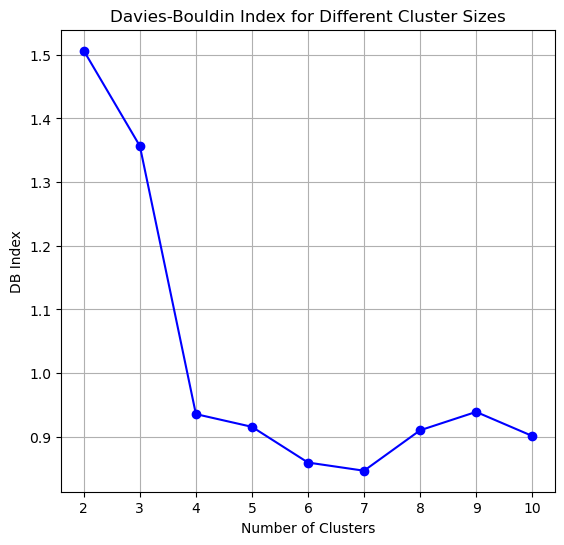

In [33]:
# Plot Davies-Bouldin Index
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, db_indices, marker='o', linestyle='-', color='blue')
plt.title("Davies-Bouldin Index for Different Cluster Sizes")
plt.xlabel("Number of Clusters")
plt.ylabel("DB Index")
plt.grid(True)

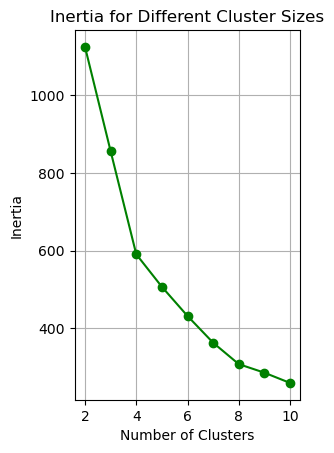

In [34]:
# Plot Inertia
plt.subplot(1, 2, 2)
plt.plot(cluster_range, inertia_scores, marker='o', linestyle='-', color='green')
plt.title("Inertia for Different Cluster Sizes")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)

In [35]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [37]:
# Choose the optimal number of clusters based on the above plots
optimal_clusters = int(input("Enter the optimal number of clusters based on the plots: "))

Enter the optimal number of clusters based on the plots: 4


In [38]:
# Run K-Means with the optimal number of clusters
final_kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
final_kmeans.fit(clustering_features_scaled)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [39]:
# Add the cluster labels to the original dataset
customer_clustering_features['Cluster'] = final_kmeans.labels_

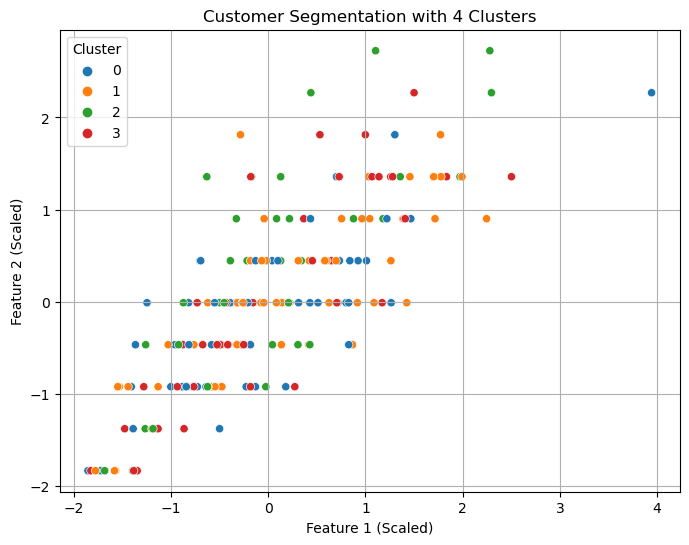

In [40]:
# Visualize final clusters (using the first two features for simplicity)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=clustering_features_scaled[:, 0], 
    y=clustering_features_scaled[:, 1],
    hue=final_kmeans.labels_,
    palette="tab10",
    legend="full"
)
plt.title(f"Customer Segmentation with {optimal_clusters} Clusters")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [41]:
# Print final DB Index for the chosen clusters
final_db_index = davies_bouldin_score(clustering_features_scaled, final_kmeans.labels_)
print(f"Final Davies-Bouldin Index for {optimal_clusters} clusters: {final_db_index}")

Final Davies-Bouldin Index for 4 clusters: 0.9355298648489481


By this Task 3: Customer Segmentation / Clustering completed 

● Clustering logic and metrics. 
● Visual representation of clusters.